In [36]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd

In [2]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)

In [11]:
train_label = train[:, 0]
train_data = np.resize(train[:, 1:], (train.shape[0], 28, 28))

In [90]:
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)
test = np.resize(test, (test.shape[0], 28, 28))

In [91]:
train_label.shape, train_data.shape, test.shape

((42000,), (42000, 28, 28), (28000, 28, 28))

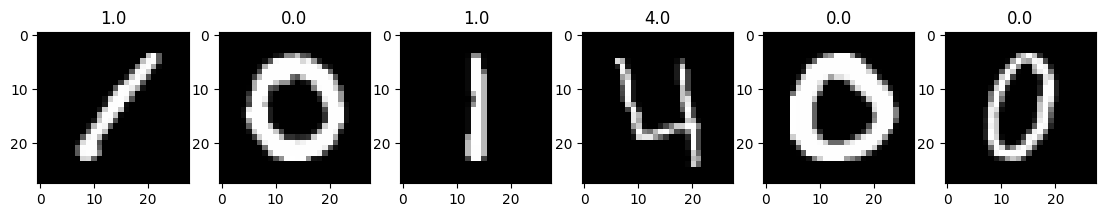

In [14]:
fig = plt.figure(figsize=(16, 10))
for i, image in enumerate(train_data[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(image, cmap='gray')
    subplot.set_title('%s' % train_label[i - 1])

In [15]:
train_sobel_x = np.zeros_like(train_data)
train_sobel_y = np.zeros_like(train_data)
for i in range(len(train_data)):
    train_sobel_x[i] = cv2.Sobel(train_data[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_data[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [16]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

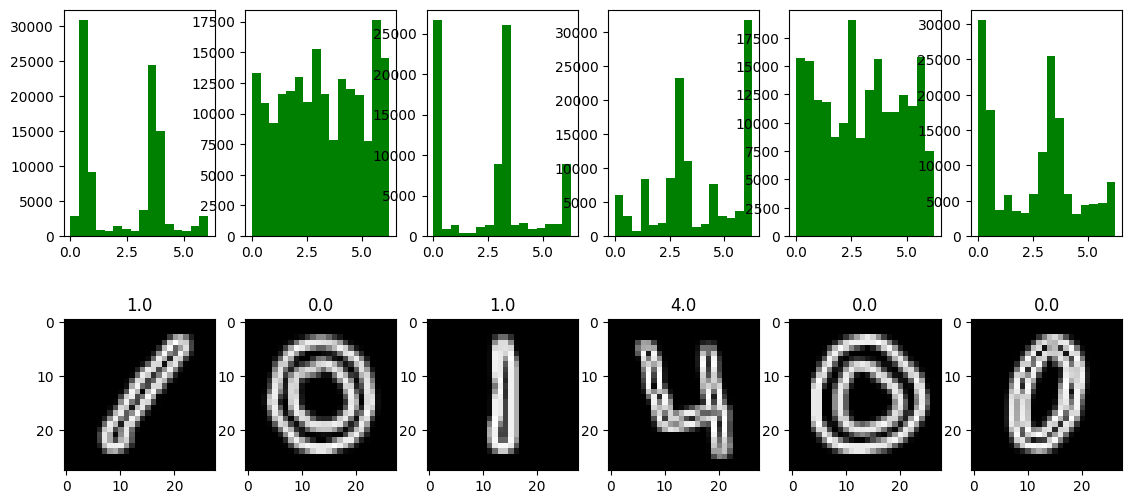

In [18]:
fig = plt.figure(figsize=(16, 10))
for i, image in enumerate(train_g[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(image, cmap='gray')
    subplot.set_title('%s' % train_label[i - 1])
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(), bins=16, color='green', weights=train_g[i - 1].flatten())

In [19]:
test_sobel_x = np.zeros_like(test)
test_sobel_y = np.zeros_like(test)
for i in range(len(test)):
    test_sobel_x[i] = cv2.Sobel(test[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

In [20]:
# Histogram of oriented gradients

train_hist = np.zeros((len(train_data), 16))
for i in range(len(train_data)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist

(array([[1.1844e+04, 1.6095e+04, 9.0000e+03, 4.0900e+03, 9.2300e+02,
         4.8000e+01, 0.0000e+00],
        [1.0638e+04, 1.5730e+04, 9.1940e+03, 4.4430e+03, 1.6610e+03,
         3.1000e+02, 2.4000e+01],
        [1.8995e+04, 1.4886e+04, 6.1760e+03, 1.6010e+03, 2.9900e+02,
         3.8000e+01, 5.0000e+00],
        [1.7960e+04, 1.5106e+04, 6.7470e+03, 1.8450e+03, 3.0600e+02,
         3.5000e+01, 1.0000e+00],
        [2.2020e+04, 1.3313e+04, 4.9320e+03, 1.3700e+03, 2.8800e+02,
         6.3000e+01, 1.4000e+01],
        [3.2756e+04, 8.3900e+03, 8.0300e+02, 4.6000e+01, 5.0000e+00,
         0.0000e+00, 0.0000e+00],
        [3.0858e+04, 1.0270e+04, 8.3700e+02, 3.2000e+01, 3.0000e+00,
         0.0000e+00, 0.0000e+00],
        [2.7132e+04, 1.2436e+04, 1.9150e+03, 4.5100e+02, 6.2000e+01,
         4.0000e+00, 0.0000e+00],
        [1.1231e+04, 1.6117e+04, 8.4930e+03, 4.8990e+03, 1.1640e+03,
         9.4000e+01, 2.0000e+00],
        [1.2727e+04, 1.4723e+04, 8.2640e+03, 4.2400e+03, 1.7250e+03,
    

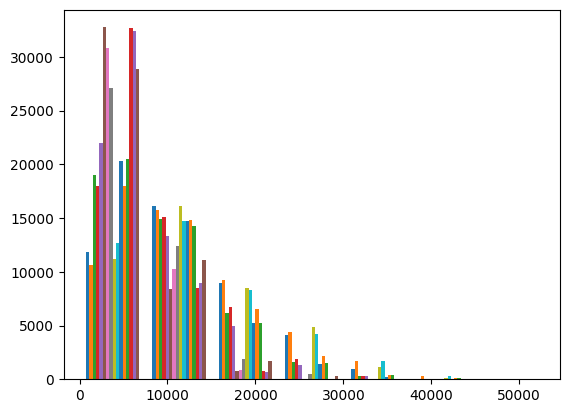

In [ ]:
plt.hist(train_hist, bins=7)

In [21]:
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]

In [50]:
# Histogram of oriented gradients

test_hist = np.zeros((len(test), 16))
for i in range(len(test)):
    hist, borders = np.histogram(test_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i])
    test_hist[i] = hist

In [54]:
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

In [22]:
y_train, y_val, x_train, x_val = train_test_split(train_label, train_hist, test_size=0.25, random_state=7)

In [23]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((31500, 16), (31500,), (10500, 16), (10500,))

In [46]:
svc = SVC(decision_function_shape='ovo', kernel='poly', random_state=7).fit(x_train, y_train)

In [68]:
preds = svc.predict(x_val)

In [69]:
accuracy = accuracy_score(y_val, preds)
print(f'Точность составила {round(accuracy, 3)}')

Точность составила 0.663


In [49]:
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

         0.0       0.48      0.51      0.50      1047
         1.0       0.96      0.96      0.96      1190
         2.0       0.51      0.48      0.49      1015
         3.0       0.64      0.69      0.66      1100
         4.0       0.73      0.73      0.73      1046
         5.0       0.65      0.66      0.66       907
         6.0       0.51      0.48      0.50      1016
         7.0       0.86      0.81      0.83      1090
         8.0       0.56      0.58      0.57      1060
         9.0       0.69      0.68      0.68      1029

    accuracy                           0.66     10500
   macro avg       0.66      0.66      0.66     10500
weighted avg       0.66      0.66      0.66     10500



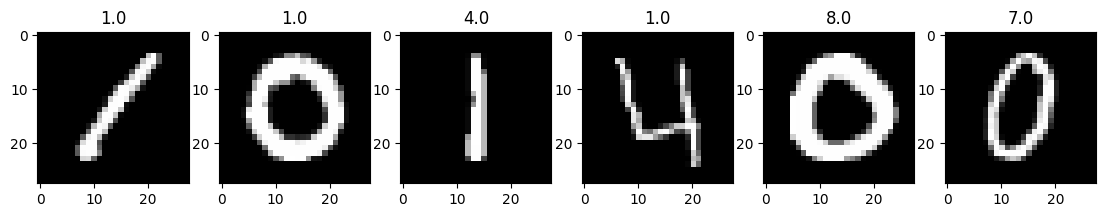

In [98]:
fig = plt.figure(figsize=(16, 10))
for i, image in enumerate(train_data[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(image, cmap='gray')
    subplot.set_title('%s' % preds[i - 1])

In [ ]:
# submission output
predictions = pd.DataFrame({'ImageId': range(1, len(preds) + 1), 'Label': preds})
predictions.to_csv('submission_train.csv', index=False)

In [99]:
predictions.head(6)

,ImageId,Label
0,1,1.0
1,2,1.0
2,3,4.0
3,4,1.0
4,5,8.0
5,6,7.0


In [104]:
# Prediction for test data (without labels)

prediction = svc.predict(test_hist)

In [105]:
df_submission = pd.DataFrame({"ImageId": range(1, len(prediction) + 1), "Label": prediction})
df_submission.to_csv("submission_test.csv", index=False)

In [106]:
df_submission.head(6)

,ImageId,Label
0,1,2.0
1,2,5.0
2,3,9.0
3,4,0.0
4,5,3.0
5,6,7.0


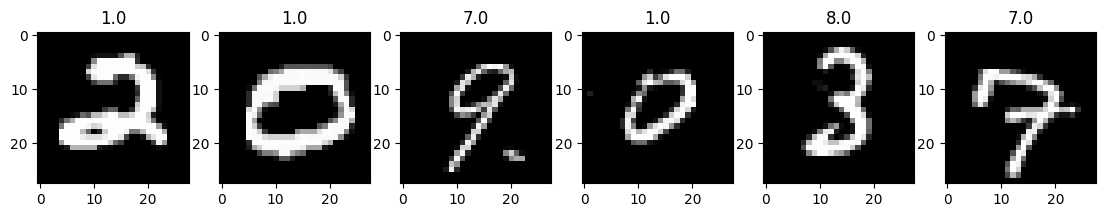

In [100]:
fig = plt.figure(figsize=(16, 10))
for i, image in enumerate(test[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(image, cmap='gray')
    subplot.set_title('%s' % prediction[i - 1])